## Extract TLD in Audio Fingerprinting scripts

This notebook extracts the TLDs in Audio Fingerprinting scripts. The heuristics to find out the Audio Fingerprinting scripts
is directly taken from [2019_03_willougr_fingerprinting_implementation_sixth_sense/Audio Fingerprinting Heuristics](https://github.com/mozilla/overscripted/blob/master/analyses/2019_03_willougr_fingerprinting_implementation_sixth_sense/Audio%20Fingerprinting%20Heuristics.ipynb).

In [1]:
import dask.dataframe as dd
import json

from dask.distributed import Client, progress

DATA_DIR = 'YOUR DATA DIRECTORY HERE'
DATA_DIR_FULL = '/home/soumya/Dataset/sample_0.parquet'
Client()

/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:45485 Dashboard: http://127.0.0.1:37327/status,Cluster Workers: 4 Cores: 12 Memory: 8.25 GB


## Setup

In [2]:
df = dd.read_parquet(DATA_DIR_FULL, columns=['script_url', 'symbol'])

## Build Candidate URLs for `OfflineAudioContext.createOscillator`

In [3]:
create_oscillator_df = df[df.symbol == 'OfflineAudioContext.createOscillator']
create_oscillator_urls = create_oscillator_df.script_url.unique().persist()
progress(create_oscillator_urls, notebook=False)

/home/soumya/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [4]:
create_oscillator_urls = create_oscillator_urls.compute()
create_oscillator_urls[0:5]

0    https://api.b2c.com/api/init-182h1kagypftheeqt...
1      https://www.alaskaair.com/px/client/main.min.js
2    https://api.b2c.com/api/init-342kzwc638ij98bun...
3    https://www.avito.st/s/cc/32cdc46e07ef6a4e30d9...
4              http://media1.admicro.vn/core/fipmin.js
Name: script_url, dtype: object

## Build Candidate URLs for `OfflineAudioContext.createDynamicsCompressor`

In [5]:
create_dynamics_df = df[df.symbol == 'OfflineAudioContext.createDynamicsCompressor']
create_dynamics_urls = create_dynamics_df.script_url.unique().persist()
progress(create_dynamics_urls, notebook=False)

In [6]:
create_dynamics_urls = create_dynamics_urls.compute()
create_dynamics_urls[0:5]

0    https://api.b2c.com/api/init-182h1kagypftheeqt...
1      https://www.alaskaair.com/px/client/main.min.js
2    https://api.b2c.com/api/init-342kzwc638ij98bun...
3    https://www.avito.st/s/cc/32cdc46e07ef6a4e30d9...
4              http://media1.admicro.vn/core/fipmin.js
Name: script_url, dtype: object

## Build Candidate URLs for `OfflineAudioContext.destination`

In [7]:
destination_df = df[df.symbol == 'OfflineAudioContext.destination']
destination_urls = destination_df.script_url.unique().persist()
progress(destination_urls, notebook=False)

In [8]:
destination_urls = destination_urls.compute()
destination_urls[0:5]

0    https://api.b2c.com/api/init-182h1kagypftheeqt...
1      https://www.alaskaair.com/px/client/main.min.js
2    https://api.b2c.com/api/init-342kzwc638ij98bun...
3    https://www.avito.st/s/cc/32cdc46e07ef6a4e30d9...
4              http://media1.admicro.vn/core/fipmin.js
Name: script_url, dtype: object

## Build Candidate URLs for `OfflineAudioContext.startRendering`

In [9]:
start_rendering_df = df[df.symbol == 'OfflineAudioContext.startRendering']
start_rendering_urls = start_rendering_df.script_url.unique().persist()
progress(start_rendering_urls, notebook=False)

In [10]:
start_rendering_urls = start_rendering_urls.compute()
start_rendering_urls[0:5]

0    https://api.b2c.com/api/init-182h1kagypftheeqt...
1      https://www.alaskaair.com/px/client/main.min.js
2    https://api.b2c.com/api/init-342kzwc638ij98bun...
3    https://www.avito.st/s/cc/32cdc46e07ef6a4e30d9...
4              http://media1.admicro.vn/core/fipmin.js
Name: script_url, dtype: object

## Build Candidate URLs for `OfflineAudioContext.oncomplete`

In [11]:
on_complete_df = df[df.symbol == 'OfflineAudioContext.createOscillator']
on_complete_urls = on_complete_df.script_url.unique().persist()
progress(on_complete_urls, notebook=False)

In [12]:
on_complete_urls = on_complete_urls.compute()
on_complete_urls[0:5]

0    https://api.b2c.com/api/init-182h1kagypftheeqt...
1      https://www.alaskaair.com/px/client/main.min.js
2    https://api.b2c.com/api/init-342kzwc638ij98bun...
3    https://www.avito.st/s/cc/32cdc46e07ef6a4e30d9...
4              http://media1.admicro.vn/core/fipmin.js
Name: script_url, dtype: object

## Scripts must call all 5 functions: ["OfflineAudioContext.createOscillator", "OfflineAudioContext.createDynamicsCompressor", "OfflineAudioContext.destination", "OfflineAudioContext.startRendering", "OfflineAudioContext.oncomplete"]

In [13]:
audio_fp_urls = set(create_oscillator_urls) & \
    set(create_dynamics_urls) & \
    set(destination_urls) & \
    set(start_rendering_urls) & \
    set(on_complete_urls)
print('# of script_urls using audio fingerprinting:', len(audio_fp_urls))

# of script_urls using audio fingerprinting: 52


In [14]:
all_candidate_urls = set(create_oscillator_urls) | \
    set(create_dynamics_urls) | \
    set(destination_urls) | \
    set(start_rendering_urls) | \
    set(on_complete_urls)
not_audio_fp_urls = all_candidate_urls - audio_fp_urls
print('# of script_urls that did not call all 5 symbols:', len(not_audio_fp_urls))

# of script_urls that did not call all 5 symbols: 0


## Save URLs

In [15]:
with open('audio_fingerprinting.json', 'w') as f:
    f.write(json.dumps(list(audio_fp_urls)))

In [16]:
with open('not_audio_fingerprinting.json', 'w') as f:
    f.write(json.dumps(list(not_audio_fp_urls)))

## Find Locations

In [17]:
with open('audio_fingerprinting.json', 'r') as f:
    audio_fp_urls = json.load(f)

In [18]:
df = dd.read_parquet(DATA_DIR_FULL, columns=['script_url', 'location'])

In [19]:
df_locs = df[df.script_url.isin(audio_fp_urls)]
locs = df_locs.location.unique().persist()
progress(locs, notebook=False)

In [20]:
print('# of locations that call audio fingerprinting scripts:', len(locs))

# of locations that call audio fingerprinting scripts: 184


In [21]:
audio_fp_urls[0:10]

['https://js.ad-score.com/score.min.js?pid=1000343&tt=g#tid=DFP_JS&l1=/15188745/Lipsum-Unit1&l2=lipsum.com&l3=https://fi.lipsum.com/&phfl=l6&uip=%%USER_IP%%&pub_domain=https://fi.lipsum.com/&ref=https://fi.lipsum.com/&cb=1124495235',
 'https://api.b2c.com/api/init-18433pfr1rcxvupjmde.js',
 'https://js.ad-score.com/score.min.js?pid=1000263&tt=g#tid=undefined&cb=0.8402445868418027',
 'https://www.avito.st/s/cc/32cdc46e07ef6a4e30d9bdcc67fb06a0aa678691.js?19ccb94',
 'https://api.b2c.com/api/init-34768esabcra9zunlch.js',
 'https://client.perimeterx.net/PXHf9Ns48h/main.min.js',
 'https://client.perimeterx.net/PXYMJ915yn/main.min.js',
 'https://www.jstor.org/px/client/main.min.js',
 'https://api.b2c.com/api/init-105ksyb0ql3ef21itif.js',
 'https://media1.admicro.vn/core/fipmin.js']

## Extract TLD

In [22]:
import tldextract
opsuffix=[]
opurls=[]
for i in range(len(audio_fp_urls)):
    opurls.append(tldextract.extract(audio_fp_urls[i]))
    opsuffix.append(opurls[i].suffix)
print(opsuffix)


['com', 'com', 'com', 'st', 'com', 'net', 'net', 'org', 'com', 'vn', 'net', 'pub', 'com', 'com', 'net', 'com', 'com', 'com', 'com', 'com', 'com', 'net', 'net', 'net', 'com', 'com', 'com', 'com', 'net', 'com', 'com', 'com', 'net', 'net', 'com', 'com', 'com', 'net', 'vn', 'io', 'com', 'com', 'net', 'net', 'com', 'com', 'net', 'com', 'com', 'com', 'org', 'com']


In [23]:
len(audio_fp_urls)

52

## Frequency of each TLD

In [24]:
import collections
for i in range(len(opsuffix)):
    counter=collections.Counter(opsuffix)
print(counter)

Counter({'com': 31, 'net': 14, 'org': 2, 'vn': 2, 'st': 1, 'pub': 1, 'io': 1})


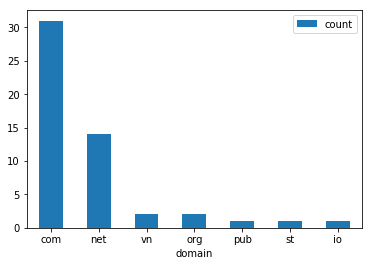

In [26]:
import pandas as pd
dfplot = pd.DataFrame({'domain':['com', 'net', 'vn','org','pub','st','io'], 'count':[31,14,2,2,1,1,1]})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)